In [31]:
!pip install mpld3
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import mpld3
from google.colab import drive
drive.mount('/content/gdrive')
file_name = "/content/gdrive/MyDrive/movies_metadata.csv"
data = pd.read_csv(file_name, engine="python")
# use only 2000
data = data.head(2000)
# Check if there is null in building TF-IDF
data['overview'].isnull().sum()
# Remove Null from overview
data['overview'] = data['overview'].fillna('')  # fillna(""): delete null
data['overview'].isnull().sum() #  Null check again
titles = data['original_title']
synopses =data['overview']
# TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
# Movie index
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
# (1)
# K-means clustering
from sklearn.cluster import KMeans
num_clusters = 10  # 10 groups
km = KMeans(n_clusters=num_clusters) # default: Euclidean
%time km.fit(tfidf_matrix)   # %time: computing time
clusters = km.labels_.tolist()
films = { 'title': titles, 'synopsis': synopses, 'cluster': clusters }
frame = pd.DataFrame(films)
print(frame['cluster'].value_counts())
# Find movies in the same cluster as "Jumanji"
movies_in_same_cluster = frame[frame['cluster'] == jumanji_cluster]

# Print the number of movies in the same cluster
num_movies_in_same_cluster = len(movies_in_same_cluster)
print(f'Number of movies in the same cluster as Jumanji: {num_movies_in_same_cluster}')

#(2)
# Hierarchical document clustering
# Sklearn
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
result1 = cluster.fit_predict(tfidf_matrix.toarray())
# Find the cluster of the movie "Jumanji"
jumanji_cluster_hierarchical = result1[jumanji_index]

# Find movies in the same cluster as "Jumanji" for hierarchical clustering
movies_in_same_cluster_hierarchical = np.where(result1 == jumanji_cluster_hierarchical)[0]

# Print the number of movies in the same cluster for hierarchical clustering
num_movies_in_same_cluster_hierarchical = len(movies_in_same_cluster_hierarchical)
print(f'Number of movies in the same cluster as Jumanji (Hierarchical): {num_movies_in_same_cluster_hierarchical}')

# (3)
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:10]
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]
get_recommendations('Jumanji')
# Recommend movies similar to 'Jumanji' and get the top 3
recommendations = get_recommendations('Jumanji')[:3]

# Print the top 3 recommended movies
print("Top 3 Recommended Movies:")
print(recommendations)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 1.84 s, sys: 3.83 ms, total: 1.85 s
Wall time: 2.56 s
2    332
7    290
6    241
4    235
9    189
5    170
3    154
8    133
0    133
1    123
Name: cluster, dtype: int64
Number of movies in the same cluster as Jumanji: 123


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of movies in the same cluster as Jumanji (Hierarchical): 1582
Top 3 Recommended Movies:
1                  Jumanji
1506    The Innocent Sleep
8             Sudden Death
Name: title, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[0.02178283 0.02177808 0.80398575 0.02178162 0.02178239 0.02177967
 0.02177742 0.02177742 0.02177742 0.02177742]
Topic 1: [('killer', 9.31), ('serial', 8.08), ('murder', 5.52), ('murders', 4.73), ('police', 4.61)]
Topic 2: [('professor', 8.84), ('date', 4.97), ('friends', 4.32), ('recently', 4.22), ('given', 4.17)]
Topic 3: [('life', 43.14), ('young', 42.93), ('new', 39.53), ('family', 38.06), ('love', 35.09)]
Topic 4: [('disney', 5.5), ('freddy', 4.27), ('hollywood', 3.76), ('fred', 3.71), ('manhattan', 3.68)]
Topic 5: [('max', 8.25), ('agent', 6.66), ('people', 6.25), ('stop', 6.06), ('computer', 5.97)]
Topic 6: [('coach', 4.99), ('basketball', 3.66), ('fashion', 3.53), ('game', 3.09), ('team', 3.02)]
Topic 7: [('smith', 3.35), ('vacation', 2.86), ('violent', 1.11), ('pair', 0.41), ('killers', 0.4)]
Topic 8: [('planet', 6.27), ('alex', 5.73), ('alien', 5.

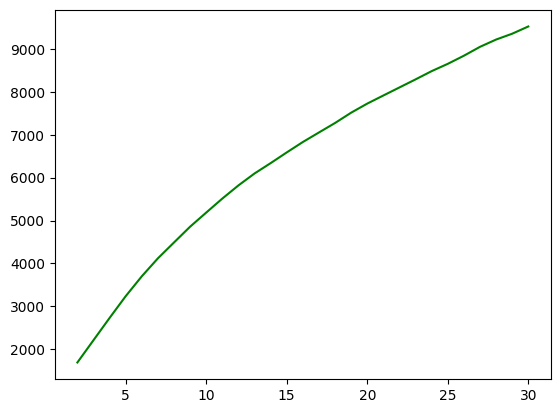

In [39]:
import pandas as pd
import urllib.request
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from google.colab import drive
drive.mount('/content/gdrive')

file_name = "/content/gdrive/MyDrive/movies_metadata.csv"
data = pd.read_csv(file_name, engine="python")
data['overview'][0]
data['overview'].isnull().sum()
data['overview'] = data['overview'].fillna('')
data['overview'].isnull().sum()
titles = data['original_title']
synopses =data['overview']
# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)
X = vectorizer.fit_transform(frame['synopsis'])
# (1) LDA model
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online',random_state=777,max_iter=5)
lda_top = lda_model.fit_transform(X)
print(lda_top[0])
# (2) vocab
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)
# (3) perflexity
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(vectorizer, start=1, end=30, max_iter=5, topic_word_prior= 0.1,
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter,
                                        topic_word_prior= topic_word_prior,
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)
        lda.fit(vectorizer)
        iter_num.append(i)
        pv = lda.perplexity(vectorizer)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))
best_num_topics = show_perplexity(X, start=2, end=30, max_iter=5)